In [1]:
#prelaminary
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt

1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

Covariance matrix:
 [[ 1.04459186  0.96211212  3.05129585]
 [ 0.96211212  9.91964545 11.84386969]
 [ 3.05129585 11.84386969 17.94646139]] 

Eigendecomposition:
 [2.67979260e+01 1.26247413e-15 2.11277273e+00]
SVD:
 [2.68456700e+01 2.11347102e+00 1.30398552e-30]
Eigendecomposition:
 [[-0.11741807 -0.81649658  0.56528429]
 [-0.57491097 -0.40824829 -0.70909147]
 [-0.80974711  0.40824829  0.42147711]]
SVD:
 [[ 0.11728597  0.57507665  0.80964859]
 [ 0.56531171 -0.7089571   0.42166632]
 [ 0.81649658  0.40824829 -0.40824829]]
Lambda:
 [[2.67979260e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.11277273e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.26247413e-15]] 

Trace(A):
 28.910698703007178 

Trace(Lambda):
 28.91069870300717 

By selecting the component 0 and 1, we retain 100.00% of the total variability


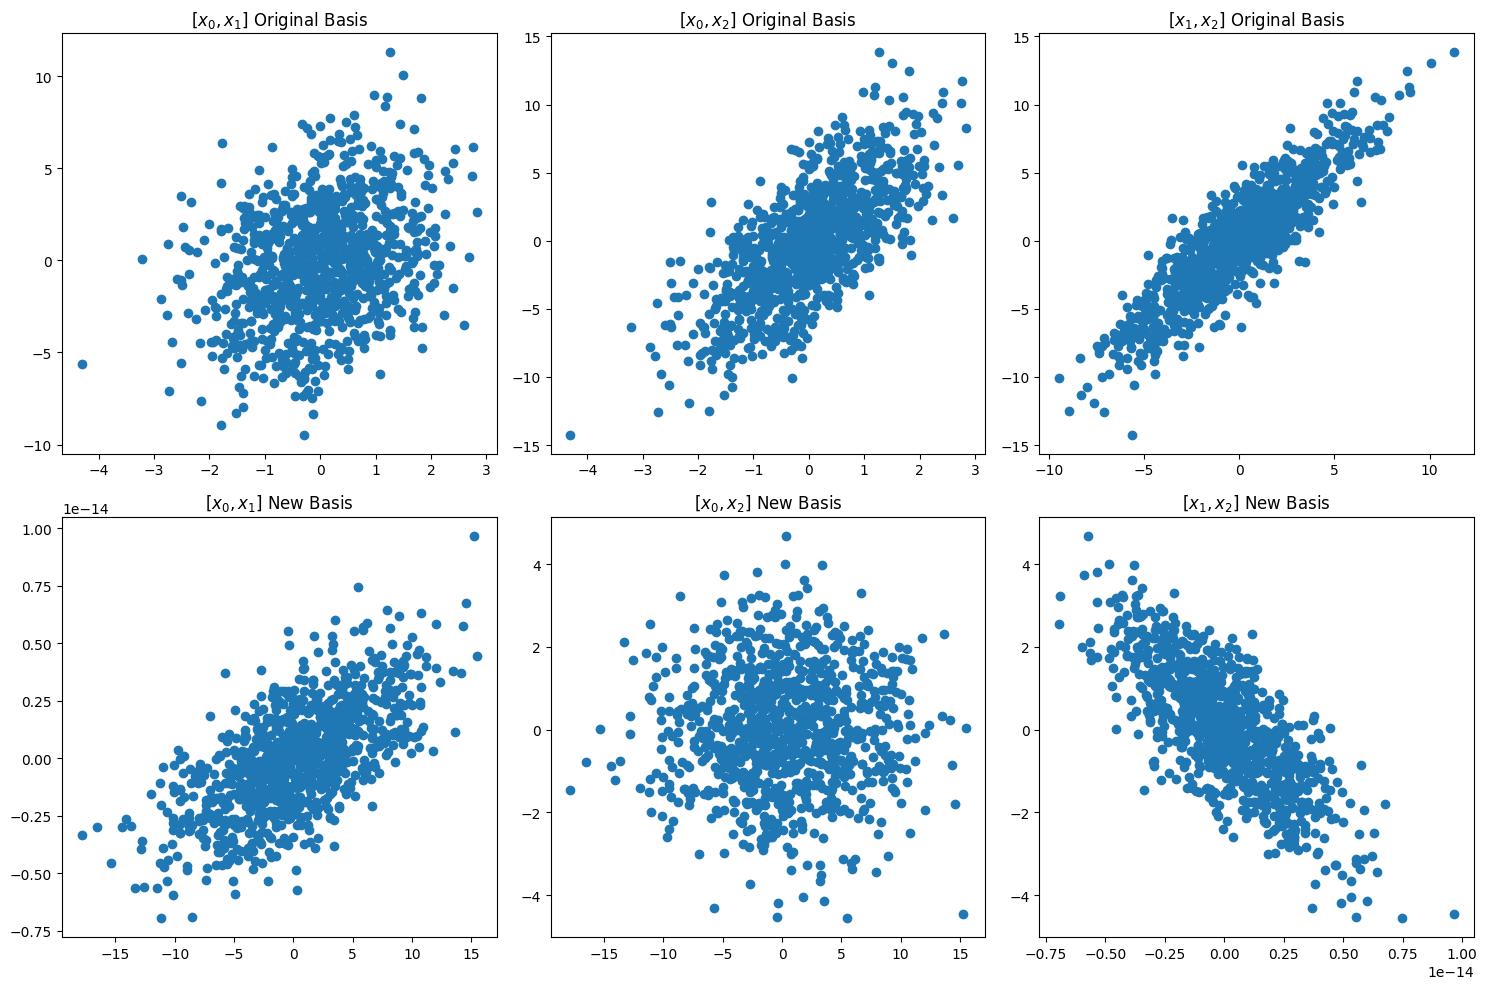

In [2]:
# Create the dataset
N = 1000 
X1 = np.random.normal(loc=0.0,scale=1.0, size=N) 
X2 = X1 + np.random.normal(loc=0.0,scale=3.0, size=N) 
X3 = 2*X1+X2 

Z = np.transpose(np.array([X1,X2,X3])) # put together

# Covarince matrix
cov = np.cov(Z, rowvar=False)
print("Covariance matrix:\n", cov, '\n')

# Eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
l, V = la.eig(cov)
l = np.real_if_close(l)
# Eigenvectors and eigenvalues using the SVD
U, S, Vt = np.linalg.svd(Z)
l_svd = S**2/(N-1)

# Comparison between eigendecomposition of the covariance matrix and SVD
print("Eigendecomposition:\n", l)
print("SVD:\n", l_svd)
print("Eigendecomposition:\n", V)
print("SVD:\n", Vt)

# Variability
k = 2 # desired reduction
Lambda_temp = np.flip(np.sort(l))
Lambda_temp_sum = np.sum(Lambda_temp[0:2])
Lambda = np.diag(np.flip(np.sort(l)))

print("Lambda:\n", Lambda, '\n')
print("Trace(A):\n", cov.trace(), '\n')
print("Trace(Lambda):\n", Lambda.trace(), '\n')

print("By selecting the component 0 and 1, we retain %.2f%% of the total variability" % (100*Lambda_temp_sum/Lambda.trace()))


# Redifine data by basis
Zp = np.dot(Z, V)

# Plotting
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Original Basis
axs[0, 0].scatter(Z[:, 0], Z[:, 1])
axs[0, 0].set_title('$[x_0, x_1]$ Original Basis')
axs[0, 1].scatter(Z[:, 0], Z[:, 2])
axs[0, 1].set_title('$[x_0, x_2]$ Original Basis')
axs[0, 2].scatter(Z[:, 1], Z[:, 2])
axs[0, 2].set_title('$[x_1, x_2]$ Original Basis')

# New Basis
axs[1, 0].scatter(Zp[:, 0], Zp[:, 1])
axs[1, 0].set_title('$[x_0, x_1]$ New Basis')
axs[1, 1].scatter(Zp[:, 0], Zp[:, 2])
axs[1, 1].set_title('$[x_0, x_2]$ New Basis')
axs[1, 2].scatter(Zp[:, 1], Zp[:, 2])
axs[1, 2].set_title('$[x_1, x_2]$ New Basis')

plt.tight_layout()
plt.show()




2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

By selecting the component 0 and 1, we retain 98.63% of the total variability


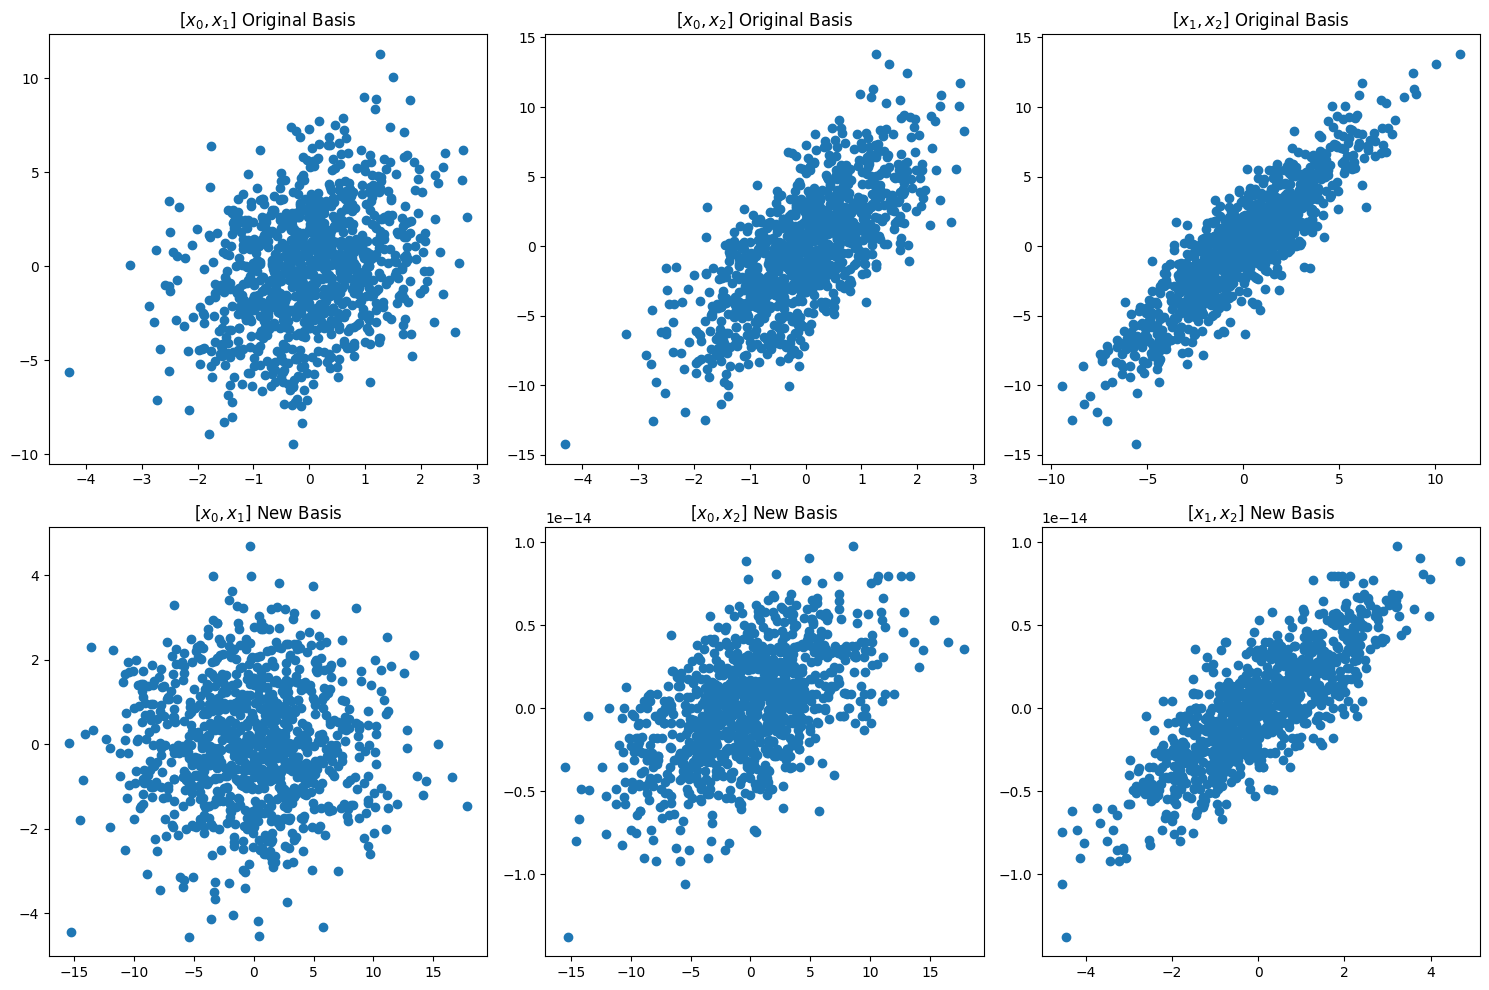

In [6]:
# Create the dataset - Add noise

# Add uncorrelated noise
num_noise_vars = 10
sigma = 2
noise_std = sigma / 20  # Standard deviation much smaller than x_1 and x_2
noise = np.random.normal(0, noise_std, size=(N, num_noise_vars))

Z = np.column_stack((Z,noise))

# Covarince matrix
cov = np.cov(Z, rowvar=False)

# Eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
l, V = la.eig(cov)
l = np.real_if_close(l)

# Variability
k = 2 # desired reduction
Lambda_temp = np.flip(np.sort(l))
Lambda_temp_sum = np.sum(Lambda_temp[0:2])
Lambda = np.diag(np.flip(np.sort(l)))

#print("Lambda:\n", Lambda, '\n')
#print("Trace(A):\n", cov.trace(), '\n')
#print("Trace(Lambda):\n", Lambda.trace(), '\n')

print("By selecting the component 0 and 1, we retain %.2f%% of the total variability" % (100*Lambda_temp_sum/Lambda.trace()))


# Redifine data by basis
Zp = np.dot(Z, V)

# Plotting
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Original Basis
axs[0, 0].scatter(Z[:, 0], Z[:, 1])
axs[0, 0].set_title('$[x_0, x_1]$ Original Basis')
axs[0, 1].scatter(Z[:, 0], Z[:, 2])
axs[0, 1].set_title('$[x_0, x_2]$ Original Basis')
axs[0, 2].scatter(Z[:, 1], Z[:, 2])
axs[0, 2].set_title('$[x_1, x_2]$ Original Basis')

# New Basis
axs[1, 0].scatter(Zp[:, 0], Zp[:, 1])
axs[1, 0].set_title('$[x_0, x_1]$ New Basis')
axs[1, 1].scatter(Zp[:, 0], Zp[:, 2])
axs[1, 1].set_title('$[x_0, x_2]$ New Basis')
axs[1, 2].scatter(Zp[:, 1], Zp[:, 2])
axs[1, 2].set_title('$[x_1, x_2]$ New Basis')

plt.tight_layout()
plt.show()

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 